In [84]:
# Change here using YOUR own first and last names
fn1 = "Yining"
ln1 = "YANG"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [85]:
filename

'sd-tsia204_lab2_yang_yining.ipynb'

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from numpy.linalg import norm
from numpy.linalg import inv

In [87]:
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [88]:
from sklearn.linear_model import LassoCV, RidgeCV

In [89]:
import scipy.stats as stat

In [90]:
np.logspace(-3,1,num=30)

array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])

In [91]:
print(pd.__version__)
print(np.__version__)

0.23.3
1.21.2


#### Q1 Data Preprocess

In [92]:
data = pd.read_csv('data_dm3.csv',header=None)

In [93]:
data

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
5,1.513286,0.072830,1.243039,-0.368609,-0.564998,-1.736720,-0.441544,-1.395122,-1.550146,0.941235,...,0.767162,0.417754,-1.010548,1.397951,0.074975,1.381528,-1.367316,1.200057,-0.292088,97.0
6,-0.501760,0.191544,-0.225878,-0.240506,1.350852,-1.253936,1.319458,2.007870,0.423578,0.417597,...,0.382681,-0.146417,-0.529950,-0.568923,0.340738,-1.312723,-0.366522,-0.347242,1.055200,138.0
7,-1.012528,-1.383290,0.686803,2.146420,1.255864,0.806962,0.137307,0.699977,-1.311624,-0.999770,...,-0.444868,-1.175901,0.481975,-0.329621,-1.712838,-0.047186,0.039768,-0.403074,0.249330,63.0
8,0.532639,1.691226,-0.008375,-1.478906,1.278352,-0.176214,-0.806066,0.515730,0.786887,-0.984347,...,0.183080,-0.194879,0.669917,-1.899072,0.122637,0.959231,-0.078359,-0.117192,1.664998,110.0
9,-0.537216,-0.128677,-0.815059,-1.273897,-0.985841,1.021629,-0.956690,1.009193,-0.030585,1.137275,...,-0.559667,-0.178620,1.130455,-1.158422,-0.376790,0.512715,-0.618469,1.463988,1.519603,310.0


In [94]:
n,p = data.shape
p-=1

In [95]:
means = np.mean(data,0)
#np.abs(means)

In [96]:
print('Data X Is Centralised ',(np.abs(means[:-1])<1e-3).all())

Data X Is Centralised  True


In [97]:
print('The center of the Y:',float(np.abs(means[-1:])))

The center of the Y: 152.13348416289594


In [98]:
stds = np.sqrt(np.var(data,0))

In [99]:
stds

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
5       1.000000
6       1.000000
7       1.000000
8       1.000000
9       1.000000
10      1.000000
11      1.000000
12      1.000000
13      1.000000
14      1.000000
15      1.000000
16      1.000000
17      1.000000
18      1.000000
19      1.000000
20      1.000000
21      1.000000
22      1.000000
23      1.000000
24      1.000000
25      1.000000
26      1.000000
27      1.000000
28      1.000000
29      1.000000
         ...    
181     1.000000
182     1.000000
183     1.000000
184     1.000000
185     1.000000
186     1.000000
187     1.000000
188     1.000000
189     1.000000
190     1.000000
191     1.000000
192     1.000000
193     1.000000
194     1.000000
195     1.000000
196     1.000000
197     1.000000
198     1.000000
199     1.000000
200     1.000000
201     1.000000
202     1.000000
203     1.000000
204     1.000000
205     1.000000
206     1.000000
207     1.000000
208     1.0000

In [100]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [102]:
print(skl.__version__)

1.0.2


In [103]:
scaler = preprocessing.StandardScaler().fit(X_train) 
# because of the version of scikitlearn, we cannot use the fit_transform 
# but only the seperately fit() and transform()

X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)

In [104]:
np.shape(X_train_transform)

(331, 210)

In [105]:
np.shape(X_test_transform)

(111, 210)

In [106]:
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

#### Q2 

In [107]:
def coef(X,y):
    return inv(X.T @ X) @ X.T @ y

In [108]:
def mean_squared_error(y1,y2):
    return np.square(np.subtract(y1,y2)).mean()

#### Q3

In [109]:
linreg = LinearRegression()

In [110]:
linreg.fit(X_train_transform,Y_train)

LinearRegression()

In [111]:
np.size(linreg.coef_)

210

In [112]:
mse_test = mean_squared_error(linreg.predict(X_test_transform),Y_test)
print('The MSE for the test data is {:.4f}'.format(mse_test))

The MSE for the test data is 4149.4673


In [113]:
df_test['OLS'] = linreg.predict(X_test_transform)
df_coef['OLS'] = linreg.coef_

In [114]:
linreg.intercept_

154.2275329347458

In [115]:
Y_train.mean()

154.34441087613294

### PCA

#### Q4

In [116]:
import seaborn as sns

Because the data has been standardized, the covariance $X.cov()$ has the same effect as the correlationship $X.corr()$.

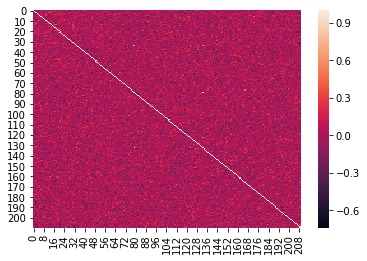

In [117]:
sns.heatmap(X.cov())

We note $U$ and $V$ 2 orthonormal matrix of scale $442*442$ and $210*210$
$$
\begin{equation}
X = U \Sigma V^{T}  
\end{equation}
$$
$$
\begin{equation}
X.cov = X^{T}X = V \Sigma U^{T}  U \Sigma V^{T}  = V \Sigma^2 V^{T}
\end{equation}
$$

Here we note the $X^{T}X$ is of the size $210*210$. For the consistency with the requirement of the conseils in the question 4, we note $U =V$ and $V = V^T$
$$
\begin{equation}
X.cov = X^{T}X = U \Sigma^2 V
\end{equation}
$$

In [118]:
U,s,V = np.linalg.svd(X.cov())

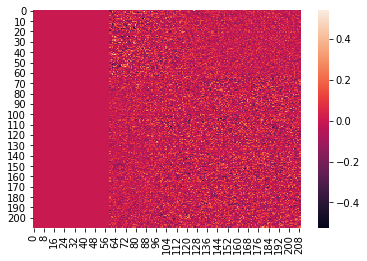

In [119]:
sns.heatmap(U-V.T)

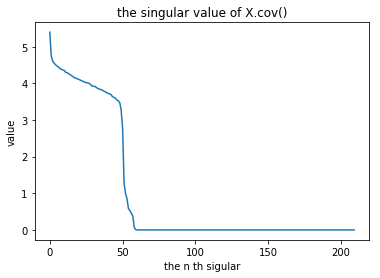

In [120]:
plt.plot([i for i in range(len(s))],s)
plt.title('the singular value of X.cov()')
plt.xlabel('the n th sigular')
plt.ylabel('value')
plt.show()

#### Q5

here we note the gram matrix as $ G = (n-1)^{-1}X^{T}X =  (n-1)^{-1}||X||^2$ and whose eigenvalue(=singular value) as $\lambda_{i}$

The singular value for the $X$ matrix is noted as $\sigma_i$

Moreover we have 
$$
\begin{equation}
X.cov = X^{T}X = U \Sigma^2 V = U \Sigma^2 U^{T}
\end{equation}
$$

The  it is obvious that $\lambda_{i}*(n-1) = \sigma_i^2$

Then the following we are going to verify the relationship

In [121]:
_,sigma2,_ = np.linalg.svd(X)  ## what returned is the square of sigma
lamb2,_ = np.linalg.eigh(X.cov()/(n-1))  ## what returned is the square of the lambda in an ascending order, that is why we inverse the lamb2 using lamb2[::-1]

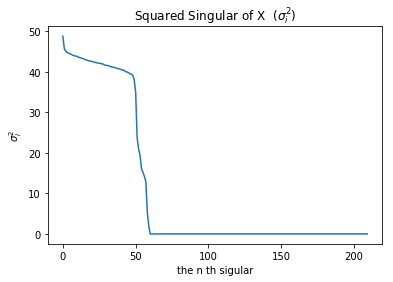

In [122]:
plt.plot([i for i in range(len(sigma2))],sigma2)
plt.title('Squared Singular of X  ($\sigma_i^{2}$)')
plt.xlabel('the n th sigular')
plt.ylabel('$\sigma_i^{2}$')
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


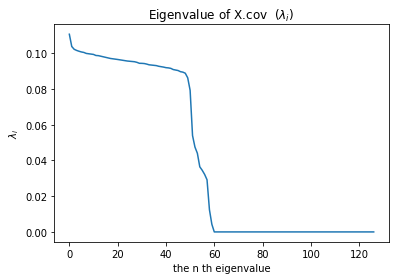

In [123]:
plt.plot([i for i in range(len(lamb2[::-1]))],np.sqrt(lamb2[::-1]))
plt.title('Eigenvalue of X.cov  ($\lambda_i $)')
plt.xlabel('the n th eigenvalue')
plt.ylabel('$\lambda_i $')
plt.show()

In [124]:
sigma2[sigma2>1e-3]

array([48.77350538, 45.75007381, 45.06253264, 44.78595193, 44.57860244,
       44.40128883, 44.28714054, 44.04187047, 43.9506472 , 43.86780801,
       43.79232277, 43.53310597, 43.49472528, 43.35853873, 43.21455498,
       43.07626626, 42.96384037, 42.79869901, 42.72405285, 42.64295407,
       42.54749222, 42.45028888, 42.35875648, 42.2767508 , 42.16527469,
       42.10635944, 42.07247677, 41.99001133, 41.83602309, 41.60368893,
       41.59185209, 41.54614798, 41.41498291, 41.23547388, 41.16538456,
       41.09582595, 41.03524331, 40.87193137, 40.78206353, 40.66822392,
       40.52842798, 40.47178786, 40.35659368, 40.06448822, 39.93272167,
       39.82278114, 39.53743808, 39.4236951 , 39.15271153, 38.02042881,
       34.93372478, 23.77732109, 20.93556659, 19.40383023, 16.06505419,
       15.2154358 , 14.19294289, 12.86349823,  5.46416371,  1.87473942])

In [125]:
np.sqrt(sigma2[sigma2>1e-3]**2./lamb2[::-1][sigma2>1e-3])

array([441., 441., 441., 441., 441., 441., 441., 441., 441., 441., 441.,
       441., 441., 441., 441., 441., 441., 441., 441., 441., 441., 441.,
       441., 441., 441., 441., 441., 441., 441., 441., 441., 441., 441.,
       441., 441., 441., 441., 441., 441., 441., 441., 441., 441., 441.,
       441., 441., 441., 441., 441., 441., 441., 441., 441., 441., 441.,
       441., 441., 441., 441., 441.])

In [126]:
n-1

441

In [127]:
print('the relation holds',np.sqrt(sigma2[sigma2>1e-3]**2./lamb2[::-1][sigma2>1e-3])-(n-1)<1e-2)

the relation holds [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


#### Q6

In [128]:
s[sigma2>1e-3]/np.sqrt(lamb2[::-1][sigma2>1e-3])

array([48.77350538, 45.75007381, 45.06253264, 44.78595193, 44.57860244,
       44.40128883, 44.28714054, 44.04187047, 43.9506472 , 43.86780801,
       43.79232277, 43.53310597, 43.49472528, 43.35853873, 43.21455498,
       43.07626626, 42.96384037, 42.79869901, 42.72405285, 42.64295407,
       42.54749222, 42.45028888, 42.35875648, 42.2767508 , 42.16527469,
       42.10635944, 42.07247677, 41.99001133, 41.83602309, 41.60368893,
       41.59185209, 41.54614798, 41.41498291, 41.23547388, 41.16538456,
       41.09582595, 41.03524331, 40.87193137, 40.78206353, 40.66822392,
       40.52842798, 40.47178786, 40.35659368, 40.06448822, 39.93272167,
       39.82278114, 39.53743808, 39.4236951 , 39.15271153, 38.02042881,
       34.93372478, 23.77732109, 20.93556659, 19.40383023, 16.06505419,
       15.2154358 , 14.19294289, 12.86349823,  5.46416371,  1.87473942])

The gram matrix is $ G = (n-1)^{-1}X^{T}X $ and its eigenvalues are $\lambda_{i}$

De plus on a
$$
\begin{equation}
X.cov = X^{T}X = U \Sigma^2 V = U \Sigma^2 U^{T}
\end{equation}
$$

In [129]:
print('The variance explained by the first 2 component explained is:',np.sqrt(lamb2[::-1][sigma2>1e-3])[0:2])

The variance explained by the first 2 component explained is: [0.11059752 0.10374166]


In [130]:
variance_explained_percent = []
sum_variance = np.sum(np.sqrt(lamb2[::-1][sigma2>1e-3]))
for i in np.sqrt(lamb2[::-1][sigma2>1e-3]):
    variance_explained_percent.append((i/sum_variance*100))

In [131]:
print('The percentage that the first 2 component explained is:',variance_explained_percent[0:2],"%")

The percentage that the first 2 component explained is: [2.142995389236665, 2.0101527759947393] %


In [132]:
projection_2 = X@U[:,0:2]

In [133]:
np.shape(projection_2)

(442, 2)

#### Q7

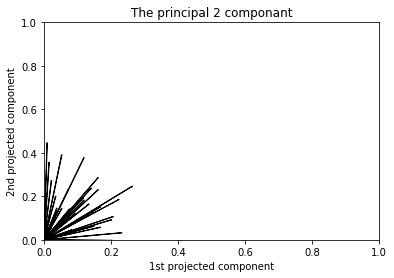

In [134]:
#plt.scatter(projection_2[:][0],projection_2[:][1],s=5)

plt.title('The principal 2 componant')
for i in range(210):
  plt.arrow(0,0,U[i][0]*np.sqrt(s[0]),U[i][1]*np.sqrt(s[1]),label = '{}th variable'.format(i))
#plt.figure(figsize=(0.01,0.01))
plt.xlabel('1st projected component')
plt.ylabel('2nd projected component')
plt.show()

In [135]:
s

array([5.39422863e+00, 4.74618878e+00, 4.60460737e+00, 4.54825735e+00,
       4.50623990e+00, 4.47046360e+00, 4.44750752e+00, 4.39838176e+00,
       4.38018002e+00, 4.36368385e+00, 4.34867921e+00, 4.29734992e+00,
       4.28977580e+00, 4.26295438e+00, 4.23468880e+00, 4.20762974e+00,
       4.18569519e+00, 4.15357968e+00, 4.13910361e+00, 4.12340483e+00,
       4.10496393e+00, 4.08622908e+00, 4.06862642e+00, 4.05288811e+00,
       4.03154283e+00, 4.02028459e+00, 4.01381701e+00, 3.99809762e+00,
       3.96882727e+00, 3.92486833e+00, 3.92263528e+00, 3.91401907e+00,
       3.88934424e+00, 3.85570137e+00, 3.84260518e+00, 3.82963018e+00,
       3.81834738e+00, 3.78801536e+00, 3.77137575e+00, 3.75035020e+00,
       3.72461105e+00, 3.71420774e+00, 3.69309445e+00, 3.63982589e+00,
       3.61592349e+00, 3.59604058e+00, 3.54469163e+00, 3.52432593e+00,
       3.47604268e+00, 3.27789797e+00, 2.76726786e+00, 1.28199773e+00,
       9.93872899e-01, 8.53761061e-01, 5.85228948e-01, 5.24964822e-01,
      

In [136]:
np.shape(U)

(210, 210)

#### Q8

In [137]:
X_train_projected = X_train@U[:,:60]
X_test_projected  = X_test@U[:,:60]

In [138]:
np.shape(X_train_projected)

(331, 60)

In [139]:
linreg_p8 = LinearRegression()
linreg_p8.fit(X_train_projected,Y_train)
print(linreg_p8.coef_)

[-14.2969313   -0.34295596   0.96121716  -5.32053689   2.35638966
  -3.32089977  -3.43466656  -1.45891946   2.03922791  -3.12407097
   0.50145095   1.28235499  -2.07793144   0.86662805   0.08890281
  -1.95000231  -2.7445319    2.70864846  -2.3329543   -1.55173635
   0.5185701    2.55614373   0.4588018   -0.64197355  -1.07423436
   3.36240712   3.10452841  -3.43563574   0.33308245  -0.21315167
  -0.97254021   1.08399314   1.24951773   1.10023357  -0.11381858
   2.50659729   1.96344469  -0.24894735  -1.54678196  -1.37554413
  -4.33502694  -2.23880047  -2.14606844  -0.44752138  -0.85195491
  -3.97305108   0.39357655  -3.16905263  -1.06026464   5.18142447
  12.0955378   14.43827019  -5.14089116  26.31247433  -0.82916232
   7.69290972 -10.14893892  -1.34025496 -14.68428547 -61.55186244]


In [140]:
mse_test_p8 = mean_squared_error(linreg_p8.predict(X_test_projected),Y_test)
print('The MSE for the test data is {:.4f}'.format(mse_test_p8))

The MSE for the test data is 3023.4697


In [141]:
np.shape(linreg_p8.predict(X_test_projected))

(111,)

In [142]:
df_test['pca_ols'] = linreg_p8.predict(X_test_projected)

#### Q9

In [143]:
lassocv = LassoCV(alphas = np.logspace(-3,1,num=30))


In [144]:
lassocv.fit(X_train_transform,Y_train)
print(lassocv.coef_)

[ 0.          0.          0.         -0.         -0.          0.
 -0.         -0.          0.          0.         -0.          0.
 -0.          2.21595369 -0.          0.         -0.         -0.51822887
  0.          0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.          0.         -0.         24.7671318  -0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.          0.         -0.          0.
 -0.         -0.         -0.          0.         -0.          0.
 -2.15631387 -0.71365944  0.         -0.         -0.         -0.
  0.         -0. 

In [145]:
mse_test_p9 = mean_squared_error(lassocv.predict(X_test_transform),Y_test)
print('The Lasso MSE for the test data is {:.4f}'.format(mse_test_p9))

The Lasso MSE for the test data is 2791.1603


In [146]:
print('The Lasso regulization parameter is {:.4f}'.format(lassocv.alpha_))

The Lasso regulization parameter is 5.2983


In [147]:
df_test['lasso'] = lassocv.predict(X_test_transform)
df_coef['lasso'] = lassocv.coef_

#### Q10

In [148]:
ridgecv = RidgeCV(alphas = np.logspace(-1,2,num=30))

In [149]:
ridgecv.fit(X_train_transform,Y_train)
print(ridgecv.coef_)

[ 1.68931246e-01  9.56217054e-01  9.16012451e-01 -7.58127351e-02
 -5.59306692e-01  7.84896558e-01 -2.51870847e-02 -4.15904986e-01
  6.50811511e-01  2.32515196e-01 -2.49513975e-01  2.90299720e-01
 -9.14940293e-02  1.64191636e+00 -7.21333833e-01  8.96366322e-02
 -6.89048002e-01 -1.78732504e+00  8.14002779e-01  3.93642809e-01
  7.93197927e-01  1.61423110e-01  1.27399511e+00  3.31246445e+00
 -5.84057807e-01  4.59487337e-01 -3.96660533e-01 -8.54674760e-01
  1.09447945e+00  4.19260975e-01  1.22513920e+00 -7.78930754e-01
  2.33295343e-01 -9.93641651e-01  1.01901495e+01  2.37709628e-01
 -7.71330003e-01  2.80210247e-01  6.18216459e-02  3.55100514e-01
 -2.20633337e-01  5.28645201e-01 -5.85024697e-01 -1.17016242e+00
  5.63742979e-01  6.09199181e-01 -4.60882709e-01  1.17318466e+00
  7.88224802e-01 -6.25830383e-01 -2.98567304e-01 -3.56480468e-01
 -1.40396330e-01 -1.46207371e+00  4.71931177e-03  9.96098754e-02
  5.34227556e-01 -1.29703839e+00  2.04835562e+01 -4.74524218e-01
 -1.05677947e+00  1.26181

In [150]:
mse_test_p10 = mean_squared_error(ridgecv.predict(X_test_transform),Y_test)
print('The Ridge MSE for the test data is {:.4f}'.format(mse_test_p10))

The Ridge MSE for the test data is 2936.0577


In [151]:
print('The Ridge regulization parameter is {:.4f}'.format(ridgecv.alpha_))

The Ridge regulization parameter is 62.1017


In [152]:
df_test['Ridge'] = ridgecv.predict(X_test_transform)
df_coef['Ridge'] = ridgecv.coef_

#### Q11

In [153]:
def t_p_value(t_stat, deg):
    # compute the p-value if t_stat follows a Student of degree deg
    p_val = (1 - stat.t.cdf(abs(t_stat), deg)) * 2
    return p_val
    

In [154]:
def linear_reg(X,y):
 beta = np.linalg.inv(X.T @ X)@X.T@y
 u=y-X@beta
 n,k = np.shape(X)
 sig2=u.T@u/(n-k)
 Var=sig2*np.linalg.inv(X.T @ X)
 std=np.sqrt(np.diag(Var))
 return beta, u, sig2, Var, std, n-k

In [155]:
def variable_forward_select(X,Y):
    n,p = np.shape(X)
    resid = []
    ind_p = [i for i in range(p)]
    ind_l = []
    remains = [True]*p
    beta_0,_,_,_,std_0, deg_t = linear_reg(X,Y)
    test_0 = beta_0/std_0
    p_val = t_p_value(test_0, deg_t)
    ind_l.append(ind_p.pop(p_val.argmax()))
    
    resid.append ( Y-beta_0[ind_l[-1]]*X[:,ind_l[-1]])
    remains[ind_l[-1]] = False
    
    
    while len(ind_l)<p:
        y = resid[-1]
        beta,_,_,_,std,deg_t = linear_reg(X[:,remains],y)
        test = beta/std
        p_val = t_p_value(test, deg_t)
        ind_l.append(ind_p.pop(p_val.argmax()))
        resid.append(y-beta[p_val.argmax()]*X[:,ind_l[-1]])
        remains[ind_l[-1]] = False
        
    return ind_l
    

In [156]:
variable_order = variable_forward_select(np.column_stack((np.ones(np.shape(X_train)[0],),X_train_transform)),Y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


In [157]:
len(variable_order)

211

In [158]:
print(skl.__version__)

1.0.2


In [159]:
print(np.array([True,False,True,False,True]).any())

True


#### Q12

In [194]:
def variable_forward_select_with_stop(X,Y,thres = 0.05):
    n,p = np.shape(X)
    #iter=0
    p_iter = []          # The historical smallest p_value
    resid = []             
    ind_p = [i for i in range(p)]    # The indice for those p-l
    ind_l = []                       # The indice for those l
    remains = [True]*p
    beta_0,_,_,_,std_0, deg_t = linear_reg(X,Y)
    test_0 = beta_0/std_0
    #print(test_0)
    #plt.figure(figsize=(7, 7))

    plt.subplot(1,3,len(ind_l)+1)
    plt.plot(ind_p,list(test_0))
    plt.title('The {}th test statistics for those variables'.format(len(ind_l)))

    p_val = t_p_value(test_0, deg_t)
    ind_l.append(ind_p.pop(p_val.argmin()))
    
    resid.append ( Y-beta_0[ind_l[-1]]*X[:,ind_l[-1]])
    remains[ind_l[-1]] = False
    print(p_val)
    p_iter.append(p_val.min())
    

    
    while (p_val[ind_l[-1]]<thres) & len(ind_p)>0:
        y = resid[-1]
        beta,_,_,_,std,deg_t = linear_reg(X[:,remains],y)
        test = beta/std

        if len(ind_l)<2:
                plt.subplot(1,3,len(ind_l)+1)
                plt.plot(ind_p,test)
                plt.title('The {}th test statistics for those variables'.format(len(ind_l)))
        p_val = t_p_value(test, deg_t)
        ind_l.append(ind_p.pop(p_val.argmin()))
        resid.append(y-beta[p_val.argmin()]*X[:,ind_l[-1]])
        remains[ind_l[-1]] = False
        if len(ind_l)<50:
            p_iter.append(p_val.min())
            
    

                
        
    #print(p_iter)
    plt.show()
    #ax = fig.add_subplot()

    return ind_l,p_iter


[3.03595927e-04 9.99999640e-01            nan 9.99999962e-01
            nan            nan            nan 9.99999987e-01
 9.99999807e-01            nan            nan 9.99999819e-01
            nan            nan 9.99999829e-01 9.99999526e-01
            nan            nan 9.99999876e-01            nan
            nan 9.99999746e-01 9.99999892e-01 9.99999367e-01
 9.92418306e-01 9.99999670e-01            nan 9.99999974e-01
            nan            nan            nan            nan
            nan            nan            nan 8.16898543e-01
            nan            nan 9.99999964e-01            nan
 9.99999828e-01 9.99999940e-01            nan 9.99999983e-01
            nan 9.99999536e-01            nan            nan
 9.99999276e-01            nan 9.99999990e-01 9.99999654e-01
 9.99999972e-01 9.99999756e-01 9.99999922e-01            nan
            nan 9.99999978e-01 9.99999965e-01 6.70961019e-01
 9.99999671e-01            nan            nan 9.99999816e-01
            nan         

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


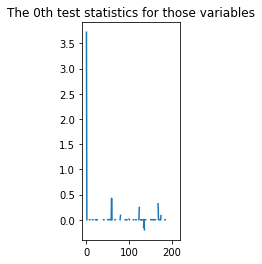

In [195]:
variable_order_05,p_iter_50 = variable_forward_select_with_stop(np.column_stack((np.ones(np.shape(X_train)[0],),X_train_transform)),Y_train)

In [188]:
p_iter_50

[nan]